# Régression linéaire multiple

1. Corrigé du quizz
2. Recap
3. Régressions multiples

On se place dans le même contexte que précédemment, simplement on utilise plusieurs variables explicatives.

Matriciellement on se retrouve avec la configuration suivante : 

$$
\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\varepsilon}, \quad
\hat{\boldsymbol{\beta}} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$$

$$
\mathbf{y} = (y_1, \dots, y_n)^\top, \quad
\mathbf{X} = 
\begin{bmatrix} 
1 & x_{11} & \dots & x_{1p} \\ 
\vdots & \vdots & \ddots & \vdots \\ 
1 & x_{n1} & \dots & x_{np} 
\end{bmatrix}, \quad
\boldsymbol{\beta} = (\beta_0, \dots, \beta_p)^\top, \quad
\boldsymbol{\varepsilon} = (\varepsilon_1, \dots, \varepsilon_n)^\top
$$



## Génération d'un jeu de données

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from utils import generate_regression_data
import plotly.graph_objects as go

X, y, _ = generate_regression_data(n_samples=50, n_features=2, noise_std=1)

fig = go.Figure(data=[go.Scatter3d(
    x=X[:,0], 
    y=X[:,1], 
    z=y,      
    mode='markers',
    marker=dict(
        size=5,
        color=y,    # couleur selon y
        colorscale='Viridis',
        opacity=0.8
    )
)])

fig.update_layout(
    scene=dict(
        xaxis_title='âge du consommateur',
        yaxis_title='salaire',
        zaxis_title='CA'
    ),
    title='Jeu de données à trois dimensions'
)

fig.show()


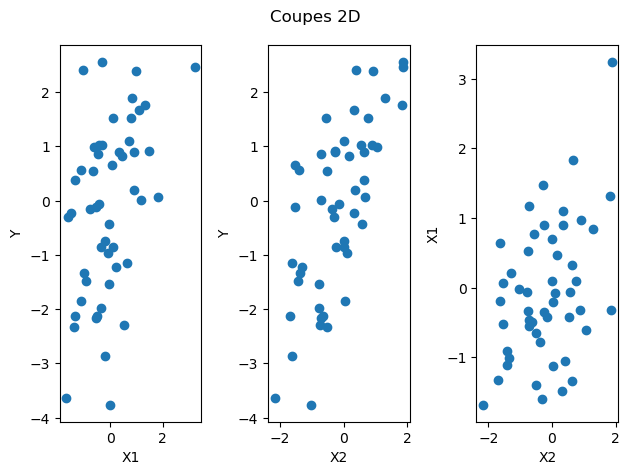

In [2]:
fig, axs = plt.subplots(1, 3)

axs[0].scatter(X[:, 0], y)
axs[0].set_xlabel("X1")
axs[0].set_ylabel("Y")
axs[1].scatter(X[:, 1], y)
axs[1].set_xlabel("X2")
axs[1].set_ylabel("Y")
axs[2].scatter(X[:, 1], X[:, 0])
axs[2].set_xlabel("X2")
axs[2].set_ylabel("X1")
plt.suptitle("Coupes 2D")
plt.tight_layout()
plt.show();

## Régression linéaire multivariée


De la même manière que pour la régression simple, on cherche à minimiser la fonction d'erreur. Comme le jeu de données est petit, on va résoudre le problème algébraiquement. 

La solution est données par : 

$
\hat{\boldsymbol{\beta}} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$

Un détour par l'algèbre linéaire s'impose pour comprendre l'intérêt de pinv ...

In [3]:
def algebraic_resolution(X, y, fit_intercept=True):
    """
    Résout le problème des moindres carrés pour une régression linéaire multiple.

    Paramètres
    ----------
    X : numpy.ndarray, shape (n_samples, n_features)
        Matrice des variables explicatives
    y : numpy.ndarray, shape (n_samples,) ou (n_samples, 1)
        Vecteur cible
    fit_intercept : bool, default=True
        Ajouter ou non un intercept (colonne de 1)

    Retour
    ------
    parameters : numpy.ndarray
        Coefficients estimés (intercept + beta si fit_intercept=True)
    """
    X = np.array(X)
    y = np.array(y).reshape(-1, 1)

    if fit_intercept:
        # Ajouter une colonne de 1 pour l'intercept
        X = np.hstack([np.ones((X.shape[0], 1)), X])
    
    # Résolution analytique : beta = (X^T X)^(-1) X^T y
    XtX = X.T @ X
    Xty = X.T @ y
    beta = np.linalg.pinv(XtX) @ Xty  # pseudo-inverse pour la stabilité

    return beta.flatten()

coef = algebraic_resolution(X, y, fit_intercept=True)
coef

array([0.06970209, 0.30086157, 1.02511132])

In [4]:
import numpy as np
import plotly.graph_objects as go

# Création d'une grille pour le plan
x1_range = np.linspace(X[:,0].min(), X[:,0].max(), 20)
x2_range = np.linspace(X[:,1].min(), X[:,1].max(), 20)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
y_grid = coef[0] + coef[1]*x1_grid + coef[2]*x2_grid

# Scatter des points
scatter = go.Scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=y,
    mode='markers',
    marker=dict(size=5, color='blue', opacity=0.8),
    name='Données'
)

# Plan de régression
surface = go.Surface(
    x=x1_grid,
    y=x2_grid,
    z=y_grid,
    colorscale='Viridis',
    opacity=0.6,
    name='Plan de régression'
)

# Figure
fig = go.Figure(data=[scatter, surface])
fig.update_layout(
    scene=dict(
        xaxis_title='X[:, 0]',
        yaxis_title='X[:, 1]',
        zaxis_title='y'
    ),
    title='Régression linéaire multiple 3D'
)
fig.show()


## Comment lire les paramètres d'une régression linéaire multiple ? 

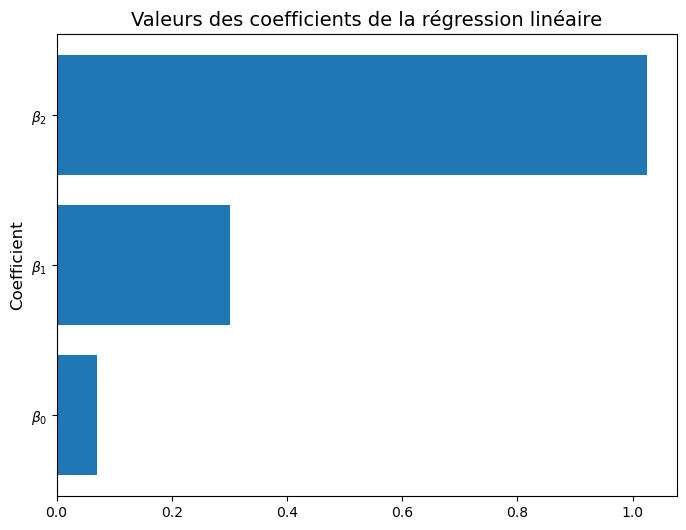

In [5]:
labels = [r'$\beta_0$', r'$\beta_1$', r'$\beta_2$']

# Création de l'histogramme
plt.figure(figsize=(8,6))
plt.barh(labels, coef)

plt.title('Valeurs des coefficients de la régression linéaire', fontsize=14)
plt.ylabel('Coefficient', fontsize=12)
plt.show()

In [6]:
from ipywidgets import interact
import matplotlib.pyplot as plt
import numpy as np

# Limites fixes
x0_min, x0_max = X[:,0].min(), X[:,0].max()
x1_min, x1_max = X[:,1].min(), X[:,1].max()
y_min, y_max = y.min(), y.max()

def plot_three_views(B0=0, B1=1, B2=1):
    fig = plt.figure(figsize=(18,5))
    
    # Création des grilles pour les 2D
    x0_grid_1d = np.linspace(x0_min, x0_max, 100)
    x1_grid_1d = np.linspace(x1_min, x1_max, 100)
    
    # ---- 2D X1 vs y ----
    ax1 = fig.add_subplot(1,3,1)
    ax1.scatter(X[:,0], y, color='blue')
    # On fixe X2 à sa moyenne pour la prédiction
    y_pred_x1 = B0 + B1*x0_grid_1d + B2*X[:,1].mean()
    ax1.plot(x0_grid_1d, y_pred_x1, color='orange')
    ax1.set_xlabel('X[:,0]')
    ax1.set_ylabel('y')
    ax1.set_title('X1 vs y')
    ax1.set_xlim(x0_min, x0_max)
    ax1.set_ylim(y_min, y_max)
    
    # ---- 2D X2 vs y ----
    ax2 = fig.add_subplot(1,3,2)
    ax2.scatter(X[:,1], y, color='blue')
    # On fixe X1 à sa moyenne pour la prédiction
    y_pred_x2 = B0 + B1*X[:,0].mean() + B2*x1_grid_1d
    ax2.plot(x1_grid_1d, y_pred_x2, color='orange')
    ax2.set_xlabel('X[:,1]')
    ax2.set_ylabel('y')
    ax2.set_title('X2 vs y')
    ax2.set_xlim(x1_min, x1_max)
    ax2.set_ylim(y_min, y_max)
    
    # ---- 3D ----
    ax3 = fig.add_subplot(1,3,3, projection='3d')
    ax3.scatter(X[:,0], X[:,1], y, color='blue')
    
    x0_range = np.linspace(x0_min, x0_max, 20)
    x1_range = np.linspace(x1_min, x1_max, 20)
    x0_grid, x1_grid = np.meshgrid(x0_range, x1_range)
    y_grid = B0 + B1*x0_grid + B2*x1_grid
    ax3.plot_surface(x0_grid, x1_grid, y_grid, color='orange', alpha=0.5)
    
    ax3.set_xlabel('X[:,0]')
    ax3.set_ylabel('X[:,1]')
    ax3.set_zlabel('y')
    ax3.set_title('3D plan de régression')
    ax3.set_xlim(x0_min, x0_max)
    ax3.set_ylim(x1_min, x1_max)
    ax3.set_zlim(y_min, y_max)
    
    plt.tight_layout()
    plt.show()

interact(plot_three_views,
         B0=(-10, 10, 0.1),
         B1=(-5, 5, 0.1),
         B2=(-5, 5, 0.1));


interactive(children=(FloatSlider(value=0.0, description='B0', max=10.0, min=-10.0), FloatSlider(value=1.0, de…

Le plot précédent nous permet d'illustrer le concept de dépendence conditionnelle : une augmentation d'une unité de X2 est associée à une augmentation de beta_2 de y2 **toutes choses étant égales par ailleurs**.


D'autre part, il ne faut pas confondre corrélation et causalité :
<p align="center">
  <img src="./img/chocolate_vs_nobel_prize.png" alt="plot" width="50%"/>
</p>

Il s'agit d'un lien de corrélation trouvé dans les données, pas d'un lien causal.

# De l'importance du scaling pour pouvoir comparer les coefficients

Lorsque les variables explicatives ont des **échelles très différentes**, les coefficients d'une régression linéaire brute sont difficiles à comparer directement. 

Par exemple, si on prédit le prix d'une maison en fonction de la **surface** (en m²) et du **nombre de chambres**, la surface peut varier de dizaines à centaines tandis que le nombre de chambres est souvent entre 1 et 6.  

Dans ce cas, le coefficient associé à la surface sera beaucoup plus grand simplement à cause de son échelle, et non parce qu’elle est intrinsèquement plus “importante”. Cela rend l’interprétation des coefficients trompeuse : on pourrait penser à tort que la surface a un impact bien plus fort que le nombre de chambres.

En scalant les variables (par exemple en ramenant chaque variable à une moyenne nulle et un écart-type unité), on met toutes les variables sur la même échelle. Les coefficients deviennent alors comparables entre eux, ce qui permet de juger correctement de l’importance relative de chaque variable dans le modèle.

Ainsi, le scaling n’affecte pas la capacité prédictive du modèle, mais il est essentiel pour interpréter les coefficients de manière fiable


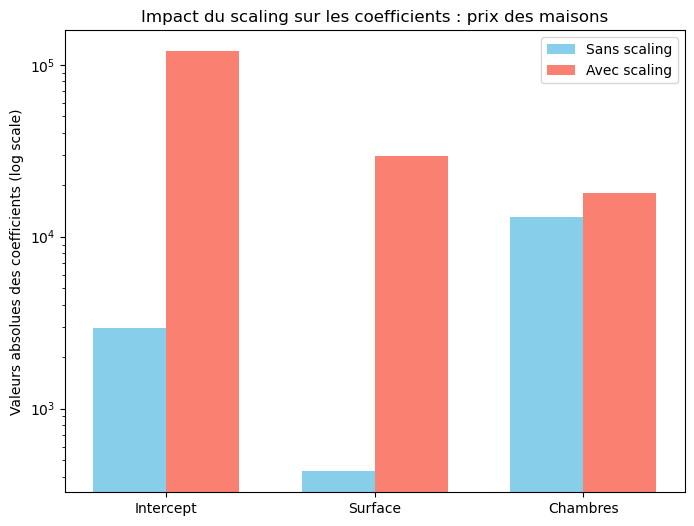

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# --- Données simulées ---
np.random.seed(42)
n_samples = 50

surface = np.random.randint(50, 300, n_samples)       # surface en m²
chambres = np.random.randint(1, 6, n_samples)         # nombre de chambres
prix = 500 * surface + 10000 * chambres + np.random.normal(0, 20000, n_samples)  # bruit

X = np.vstack([surface, chambres]).T

# --- Modèle sans scaling ---
model_raw = LinearRegression()
model_raw.fit(X, prix)
coef_raw = np.hstack([model_raw.intercept_, model_raw.coef_])

# --- Modèle avec scaling ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model_scaled = LinearRegression()
model_scaled.fit(X_scaled, prix)
coef_scaled = np.hstack([model_scaled.intercept_, model_scaled.coef_])

# --- Plot comparatif ---
labels = ["Intercept", "Surface", "Chambres"]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(x - width/2, np.abs(coef_raw), width, label="Sans scaling", color='skyblue')
ax.bar(x + width/2, np.abs(coef_scaled), width, label="Avec scaling", color='salmon')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel("Valeurs absolues des coefficients (log scale)")
ax.set_yscale("log")
ax.set_title("Impact du scaling sur les coefficients : prix des maisons")
ax.legend()

plt.show()


# Limitations du modèle de régressions linéaires multiples

- ne gère que les relations linéaires (assez évident ...)
- plus difficile à visualiser
- risque de sur-apprentissage (plus d'infos au prochain cours)
- multicolinéarité

### Exemple tiré de [scikit-learn](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html) : wage dataset


In [27]:
from sklearn.datasets import fetch_openml

survey = fetch_openml(data_id=534, as_frame=True)

X = survey.data[survey.feature_names]
X.head()

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8,no,female,21,not_member,35,Hispanic,Other,Manufacturing,Married
1,9,no,female,42,not_member,57,White,Other,Manufacturing,Married
2,12,no,male,1,not_member,19,White,Other,Manufacturing,Unmarried
3,12,no,male,4,not_member,22,White,Other,Other,Unmarried
4,12,no,male,17,not_member,35,White,Other,Other,Married


In [28]:
y = survey.target.values.ravel()
survey.target.head()


0    5.10
1    4.95
2    6.67
3    4.00
4    7.50
Name: WAGE, dtype: float64

Etude des co-variations des variables : pairplot. 

Ce pairplot met en avant la colinéarité de l'âge et des années d'expérience. 

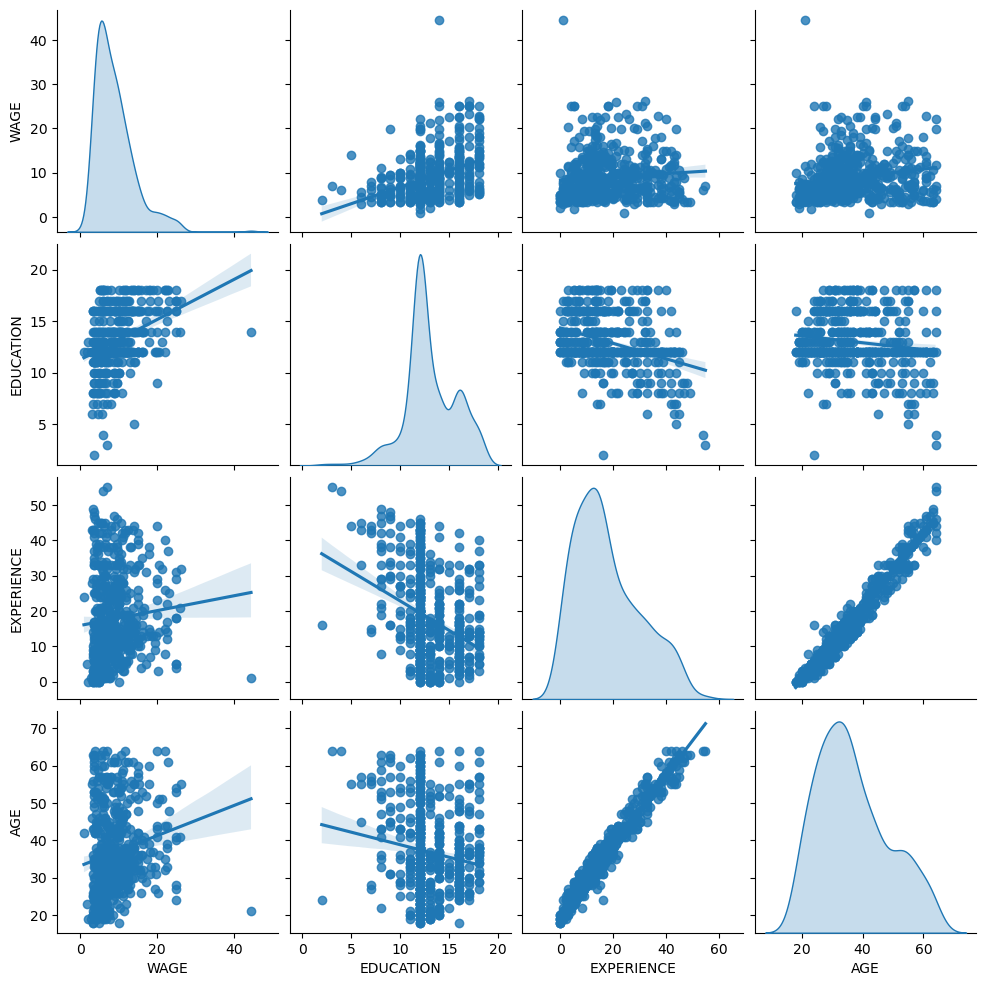

In [29]:
import seaborn as sns
train_dataset = X.copy()
train_dataset.insert(0, "WAGE", y)
_ = sns.pairplot(train_dataset, kind="reg", diag_kind="kde")

On fit différentes régressions linéaires pour des parties différentes du dataset (plus d'information là-dessus au prochain cours) et on observe une grande variabilité des coefficients pour les variables corrélées. 

<p align="center">
  <img src="./img/coefficient_variability.png" alt="plot" width="50%"/>
</p>


Pour approfondir le diagnostic on peut regarder les co-variations de ces deux coefficients : 

<p align="center">
  <img src="./img/coeff_covariations.png" alt="plot" width="50%"/>
</p>


Le modèle est très instable : il va falloir trouver une solution pour le rendre plus robuste. 

#### Solution 1 : supprimer une des deux variables.

#### Solution 2 : régression pénalisée

Ridge regression

$$
\hat{\beta}^{\text{ridge}} 
= \underset{\beta}{\arg\min} \; 
\left\{ 
\| y - X\beta \|_2^2 + \lambda \| \beta \|_2^2 
\right\}
$$

avec 

$$
\| \beta \|_2^2 = \sum_{j=1}^p \beta_j^2
$$

---

Lasso regression

$$
\hat{\beta}^{\text{lasso}} 
= \underset{\beta}{\arg\min} \; 
\left\{ 
\| y - X\beta \|_2^2 + \lambda \| \beta \|_1 
\right\}
$$

avec 

$$
\| \beta \|_1 = \sum_{j=1}^p |\beta_j|
$$


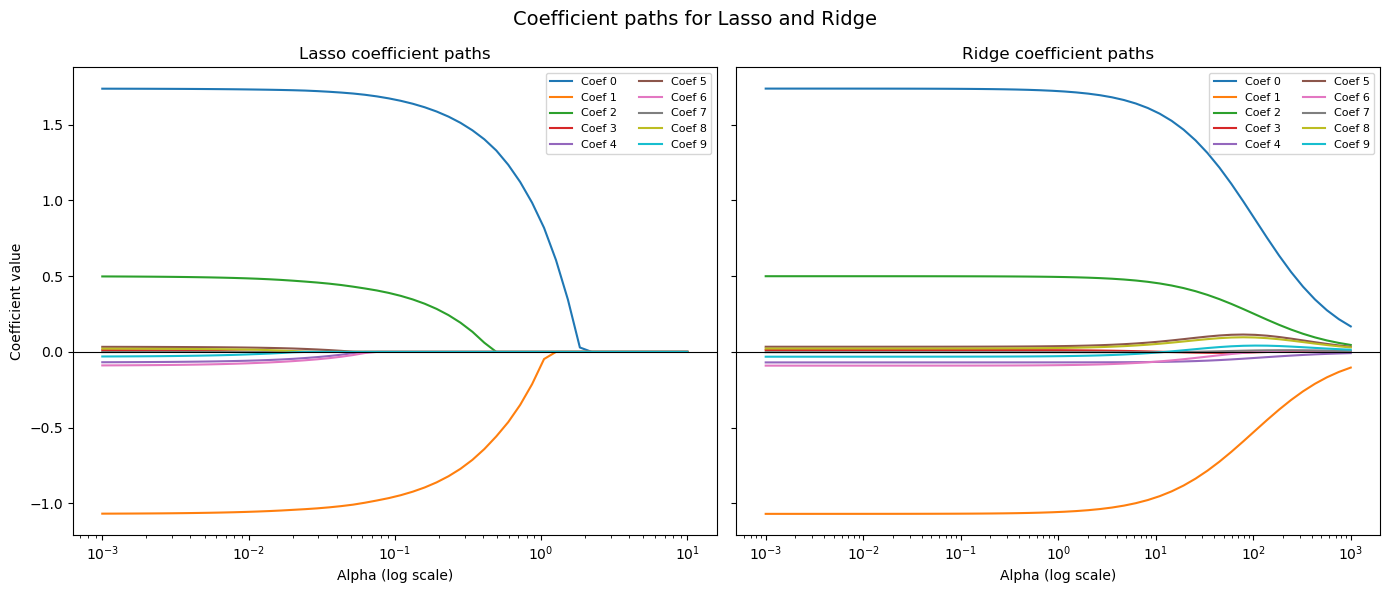

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import lasso_path, ridge_regression
from sklearn.preprocessing import StandardScaler

# --- Génération de données synthétiques ---
np.random.seed(42)
n_samples, n_features = 100, 10
X = np.random.randn(n_samples, n_features)
coef_true = np.zeros(n_features)
coef_true[0:3] = [2, -1, 0.5]  # seules 3 variables sont utiles
y = X @ coef_true + np.random.normal(0, 0.5, n_samples)

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Lasso paths ---
alphas_lasso, coefs_lasso, _ = lasso_path(X_scaled, y, alphas=np.logspace(-3, 1, 50))

# --- Ridge paths ---
alphas_ridge = np.logspace(-3, 3, 50)
coefs_ridge = []
for a in alphas_ridge:
    coef = ridge_regression(X_scaled, y, alpha=a)
    coefs_ridge.append(coef)
coefs_ridge = np.array(coefs_ridge).T  # shape (n_features, n_alphas)

# --- Plot ---
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

# Lasso
for i in range(coefs_lasso.shape[0]):
    axes[0].plot(alphas_lasso, coefs_lasso[i], label=f'Coef {i}')
axes[0].set_xscale("log")
axes[0].set_xlabel("Alpha (log scale)")
axes[0].set_ylabel("Coefficient value")
axes[0].set_title("Lasso coefficient paths")
axes[0].axhline(0, color='black', linewidth=0.8)
axes[0].legend(ncol=2, fontsize=8)

# Ridge
for i in range(coefs_ridge.shape[0]):
    axes[1].plot(alphas_ridge, coefs_ridge[i], label=f'Coef {i}')
axes[1].set_xscale("log")
axes[1].set_xlabel("Alpha (log scale)")
axes[1].set_title("Ridge coefficient paths")
axes[1].axhline(0, color='black', linewidth=0.8)
axes[1].legend(ncol=2, fontsize=8)

plt.suptitle("Coefficient paths for Lasso and Ridge", fontsize=14)
plt.tight_layout()
plt.show()


<p align="center">
  <img src="./img/lasso_ridge_path.png" alt="plot" width="50%"/>
</p>

### Solution 3 : PCA 

vue schématique s'il reste du temps

## Ressources : 

- [Common pitfalls in interpreting linear regression coefficients](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html), documentation scikit-learn